<a href="https://colab.research.google.com/github/Diegodevops26/Hackathon-Forecast-Big-Data-2025/blob/main/previs%C3%A3o_de_vendas_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Garanta que a biblioteca para ler Parquet esteja instalada
!pip install pyarrow -q

import pandas as pd

# 1. Defina o caminho base com a barra no final
BASE_PATH = '/content/drive/MyDrive/DesafioForecastVendas/'

# 2. Construa o caminho completo para cada arquivo a partir da base
TRANSACOES_PATH = BASE_PATH + 'Data/transacoes.snappy.parquet'
PRODUTOS_PATH = BASE_PATH + 'Data/produtos.snappy.parquet'
PDVS_PATH = BASE_PATH + 'Data/pdvs.snappy.parquet'

# 3. Use o comando 'print' para verificar se os caminhos estão corretos ANTES de ler
print("Caminho de Transações:", TRANSACOES_PATH)
print("Caminho de Produtos:", PRODUTOS_PATH)
print("Caminho de PDVs:", PDVS_PATH)

# 4. Agora sim, tente carregar os arquivos
try:
    df_transacoes = pd.read_parquet(TRANSACOES_PATH)
    df_produtos = pd.read_parquet(PRODUTOS_PATH)
    df_pdvs = pd.read_parquet(PDVS_PATH)
    print("\n✅ Arquivos carregados com sucesso!")
    display(df_transacoes.head())
except FileNotFoundError as e:
    print(f"\n❌ ERRO: Arquivo não encontrado. Verifique o caminho. Detalhe: {e}")

Caminho de Transações: /content/drive/MyDrive/DesafioForecastVendas/Data/transacoes.snappy.parquet
Caminho de Produtos: /content/drive/MyDrive/DesafioForecastVendas/Data/produtos.snappy.parquet
Caminho de PDVs: /content/drive/MyDrive/DesafioForecastVendas/Data/pdvs.snappy.parquet

✅ Arquivos carregados com sucesso!


,pdv,premise,categoria_pdv,zipcode
0,2204965430669363375,On Premise,Mexican Rest,30741
1,5211957289528622910,On Premise,Hotel/Motel,80011
2,9024493554530757353,Off Premise,Convenience,80751
3,8659197371382902429,On Premise,Restaurant,80439
4,1400854873763881130,On Premise,Restaurant,30093


In [3]:
import pandas as pd
import numpy as np

# Defina o caminho base para a pasta do projeto
BASE_PATH = '/content/drive/MyDrive/DesafioForecastVendas/'

# Caminhos para os arquivos de dados
TRANSACOES_PATH = BASE_PATH + 'Data/transacoes.snappy.parquet' # Use o nome real do seu arquivo
PRODUTOS_PATH = BASE_PATH + 'Data/produtos.snappy.parquet'     # Use o nome real do seu arquivo
PDVS_PATH = BASE_PATH + 'Data/pdvs.snappy.parquet'             # Use o nome real do seu arquivo

print("Caminhos definidos!")

Caminhos definidos!


In [4]:
# Garanta que a biblioteca para ler Parquet esteja instalada
!pip install pyarrow -q

import pandas as pd

# Caminhos para os seus arquivos (verifique se estão corretos)
TRANSACOES_PATH = '/content/drive/MyDrive/DesafioForecastVendas/Data/transacoes.snappy.parquet'
PRODUTOS_PATH = '/content/drive/MyDrive/DesafioForecastVendas/Data/produtos.snappy.parquet'
PDVS_PATH = '/content/drive/MyDrive/DesafioForecastVendas/Data/pdvs.snappy.parquet'

# Use a função pd.read_parquet()
df_transacoes = pd.read_parquet(TRANSACOES_PATH)
df_produtos = pd.read_parquet(PRODUTOS_PATH)
df_pdvs = pd.read_parquet(PDVS_PATH)

# O resto do código continua igual
print("Transações:")
display(df_transacoes.head())
print("\nProdutos:")
display(df_produtos.head())
print("\nPDVs:")
display(df_pdvs.head())

Transações:


,pdv,premise,categoria_pdv,zipcode
0,2204965430669363375,On Premise,Mexican Rest,30741
1,5211957289528622910,On Premise,Hotel/Motel,80011
2,9024493554530757353,Off Premise,Convenience,80751
3,8659197371382902429,On Premise,Restaurant,80439
4,1400854873763881130,On Premise,Restaurant,30093



Produtos:


,internal_store_id,internal_product_id,distributor_id,transaction_date,reference_date,quantity,gross_value,net_value,gross_profit,discount,taxes
0,7384367747233276219,328903483604537190,9,2022-07-13,2022-07-01,1.0,38.125000,37.890625,10.042625,3.950000,0.234375
1,3536908514005606262,5418855670645487653,5,2022-03-21,2022-03-01,6.0,107.250000,106.440002,24.732002,17.100000,0.810000
2,3138231730993449825,1087005562675741887,6,2022-09-06,2022-09-01,3.0,56.625000,56.220001,14.124002,5.250000,0.405000
3,3681167389484217654,1401422983880045188,5,2022-09-11,2022-09-01,129.0,1037.160023,1037.160023,156.348026,479.880006,0.000000
4,7762413312337359369,6614994347738381720,4,2022-02-18,2022-02-01,1.0,26.230000,23.950241,6.550241,0.000000,2.279758



PDVs:


,produto,categoria,descricao,tipos,label,subcategoria,marca,fabricante
0,2282334733936076502,Distilled Spirits,JOSEPH CARTRON CAFÉ LIQUEUR,Distilled Spirits,Core,Liqueurs & Cordials,Joseph Cartron Cafe,Spiribam
1,6091840953834683482,Distilled Spirits,SPRINGBANK 18 YEAR SINGLE MALT 700ML,Distilled Spirits,Specialty,Scotch Whisky,Springbank 18 Year Single Malt,Pacific Edge Wine & Spirits
2,1968645851245092408,Distilled Spirits,J BRANDT TRIPLE SEC 12/750ML 30PF,Distilled Spirits,Private Label,Liqueurs & Cordials,J Brandt Triple Sec,Sazerac Spirits
3,994706710729219179,Draft,REFORMATION CASHMERE IPA 1/4 KEG,Draft,In&Out,Other Draft,Reformation Cashmere Fresh Hop IPA,Reformation Brewery
4,9209550539540384349,Non-Alcohol,HELLA MOSCOW MULE 750ML,Non Alcohol,Core,Mixers,Hella Bitters Bloody Mary,Hella Bitter Llc


In [5]:
print("Informações sobre Transações:")
df_transacoes.info()

print("\nVerificação de nulos em Transações:")
print(df_transacoes.isnull().sum())

Informações sobre Transações:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14419 entries, 0 to 14418
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pdv            14419 non-null  object
 1   premise        14419 non-null  object
 2   categoria_pdv  14419 non-null  object
 3   zipcode        14419 non-null  int32 
dtypes: int32(1), object(3)
memory usage: 394.4+ KB

Verificação de nulos em Transações:
pdv              0
premise          0
categoria_pdv    0
zipcode          0
dtype: int64


In [6]:
# Converter para datetime, o formato pode precisar de ajuste
df_produtos['transaction_date'] = pd.to_datetime(df_produtos['transaction_date'])

In [7]:
# Verificar duplicatas em df_produtos
duplicatas_produtos = df_produtos['internal_product_id'].duplicated().sum()
print(f"Quantidade de 'internal_product_id' duplicados em df_produtos: {duplicatas_produtos}")

# Verificar duplicatas em df_pdvs
duplicatas_pdvs = df_pdvs['produto'].duplicated().sum()
print(f"Quantidade de 'produto' duplicados em df_pdvs: {duplicatas_pdvs}")

Quantidade de 'internal_product_id' duplicados em df_produtos: 6553606
Quantidade de 'produto' duplicados em df_pdvs: 0


In [8]:
# Carregar os datasets
df_transacoes = pd.read_parquet(TRANSACOES_PATH) # Adicione outros parâmetros se necessário (ex: sep=';')
df_produtos = pd.read_parquet(PRODUTOS_PATH)
df_pdvs = pd.read_parquet(PDVS_PATH)

# Visualizar as primeiras linhas de cada um
print("Transações:")
display(df_transacoes.head())
print("\nProdutos:")
display(df_produtos.head())
print("\nPDVs:")
display(df_pdvs.head())

Transações:


,pdv,premise,categoria_pdv,zipcode
0,2204965430669363375,On Premise,Mexican Rest,30741
1,5211957289528622910,On Premise,Hotel/Motel,80011
2,9024493554530757353,Off Premise,Convenience,80751
3,8659197371382902429,On Premise,Restaurant,80439
4,1400854873763881130,On Premise,Restaurant,30093



Produtos:


,internal_store_id,internal_product_id,distributor_id,transaction_date,reference_date,quantity,gross_value,net_value,gross_profit,discount,taxes
0,7384367747233276219,328903483604537190,9,2022-07-13,2022-07-01,1.0,38.125000,37.890625,10.042625,3.950000,0.234375
1,3536908514005606262,5418855670645487653,5,2022-03-21,2022-03-01,6.0,107.250000,106.440002,24.732002,17.100000,0.810000
2,3138231730993449825,1087005562675741887,6,2022-09-06,2022-09-01,3.0,56.625000,56.220001,14.124002,5.250000,0.405000
3,3681167389484217654,1401422983880045188,5,2022-09-11,2022-09-01,129.0,1037.160023,1037.160023,156.348026,479.880006,0.000000
4,7762413312337359369,6614994347738381720,4,2022-02-18,2022-02-01,1.0,26.230000,23.950241,6.550241,0.000000,2.279758



PDVs:


,produto,categoria,descricao,tipos,label,subcategoria,marca,fabricante
0,2282334733936076502,Distilled Spirits,JOSEPH CARTRON CAFÉ LIQUEUR,Distilled Spirits,Core,Liqueurs & Cordials,Joseph Cartron Cafe,Spiribam
1,6091840953834683482,Distilled Spirits,SPRINGBANK 18 YEAR SINGLE MALT 700ML,Distilled Spirits,Specialty,Scotch Whisky,Springbank 18 Year Single Malt,Pacific Edge Wine & Spirits
2,1968645851245092408,Distilled Spirits,J BRANDT TRIPLE SEC 12/750ML 30PF,Distilled Spirits,Private Label,Liqueurs & Cordials,J Brandt Triple Sec,Sazerac Spirits
3,994706710729219179,Draft,REFORMATION CASHMERE IPA 1/4 KEG,Draft,In&Out,Other Draft,Reformation Cashmere Fresh Hop IPA,Reformation Brewery
4,9209550539540384349,Non-Alcohol,HELLA MOSCOW MULE 750ML,Non Alcohol,Core,Mixers,Hella Bitters Bloody Mary,Hella Bitter Llc


In [9]:
# --- TENTE ESTE CÓDIGO CORRIGIDO ---

# 1. Fazer o primeiro merge usando a chave correta para ambos
# Merge products (which contain transactions) with PDV information
df_merged = pd.merge(df_produtos, df_transacoes, left_on='internal_store_id', right_on='pdv', how='left')

# 2. Fazer o segundo merge
# Merge the result with static product information
df_full = pd.merge(df_merged, df_pdvs, left_on='internal_product_id', right_on='produto', how='left')

# 3. Verificar o resultado
print("Shape do DataFrame completo após a correção:")
display(df_full.shape)
display(df_full.head())

Shape do DataFrame completo após a correção:


(6560698, 23)

,internal_store_id,internal_product_id,distributor_id,transaction_date,reference_date,quantity,gross_value,net_value,gross_profit,discount,...,categoria_pdv,zipcode,produto,categoria,descricao,tipos,label,subcategoria,marca,fabricante
0,7384367747233276219,328903483604537190,9,2022-07-13,2022-07-01,1.0,38.125000,37.890625,10.042625,3.950000,...,Package/Liquor,80905.0,328903483604537190,Package,BUD LIGHT CHELADA FUEGO 15/25 CN,Package,Core,Specialty,Bud Light Chelada Fuego,AB Anheuser Busch Inc
1,3536908514005606262,5418855670645487653,5,2022-03-21,2022-03-01,6.0,107.250000,106.440002,24.732002,17.100000,...,Package/Liquor,80239.0,5418855670645487653,Package,MICHELOB ULTRA 18/12 CN,Package,Core,Lager,Michelob Ultra,AB Anheuser Busch Inc
2,3138231730993449825,1087005562675741887,6,2022-09-06,2022-09-01,3.0,56.625000,56.220001,14.124002,5.250000,...,Package/Liquor,80634.0,1087005562675741887,Package,BUD LIGHT LIME 18/12 CN,Package,Core,Lager,Bud Light Lime,AB Anheuser Busch Inc
3,3681167389484217654,1401422983880045188,5,2022-09-11,2022-09-01,129.0,1037.160023,1037.160023,156.348026,479.880006,...,Package/Liquor,80226.0,1401422983880045188,Distilled Spirits,99 BUTTERSCOTCH 12/10/50ML 99PF,Allocated Spirits,None,Liqueurs & Cordials,99 Butterscotch,Sazerac Spirits
4,7762413312337359369,6614994347738381720,4,2022-02-18,2022-02-01,1.0,26.230000,23.950241,6.550241,0.000000,...,Convenience,30096.0,6614994347738381720,Package,NB VOODOO RANGER IMPERIAL IPA 15/19.2 CN,Package,Core,IPA,New Belgium Voodoo Ranger Imperial IPA,NB New Belgium


In [10]:
# Converter para datetime, o formato pode precisar de ajuste
df_produtos['transaction_date'] = pd.to_datetime(df_produtos['transaction_date'])

In [11]:
# Juntar transações com produtos
df_merged = pd.merge(df_transacoes, df_produtos, left_on='pdv', right_on='internal_store_id', how='left')

# Juntar o resultado com pdvs
df_full = pd.merge(df_merged, df_pdvs, left_on='pdv', right_on='produto', how='left')

print("Shape do DataFrame completo:", df_full.shape)
display(df_full.head())

Shape do DataFrame completo: (6515116, 23)


,pdv,premise,categoria_pdv,zipcode,internal_store_id,internal_product_id,distributor_id,transaction_date,reference_date,quantity,...,discount,taxes,produto,categoria,descricao,tipos,label,subcategoria,marca,fabricante
0,2204965430669363375,On Premise,Mexican Rest,30741,2204965430669363375,8654618855511723434,4,2022-05-10,2022-05-01,1.0,...,1.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2204965430669363375,On Premise,Mexican Rest,30741,2204965430669363375,5168467358507505407,4,2022-08-01,2022-08-01,12.0,...,7.2,14.641404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2204965430669363375,On Premise,Mexican Rest,30741,2204965430669363375,3262679882836704514,4,2022-08-01,2022-08-01,2.0,...,0.0,4.559516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2204965430669363375,On Premise,Mexican Rest,30741,2204965430669363375,14523659809755688,4,2022-07-08,2022-07-01,1.0,...,2.8,0.915087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2204965430669363375,On Premise,Mexican Rest,30741,2204965430669363375,2888002190098573554,4,2022-10-24,2022-10-01,1.0,...,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
import pandas as pd

# Assuming TRANSACOES_PATH, PRODUTOS_PATH, and PDVS_PATH are defined in a previous cell
# If not, you'll need to define them here or run the cell where they are defined.

# Load the dataframes (if not already loaded)
try:
    df_transacoes = pd.read_parquet(TRANSACOES_PATH)
    df_produtos = pd.read_parquet(PRODUTOS_PATH)
    df_pdvs = pd.read_parquet(PDVS_PATH)
    print("✅ Arquivos carregados com sucesso!")
except FileNotFoundError as e:
    print(f"❌ ERRO: Arquivo não encontrado. Verifique o caminho. Detalhe: {e}")

# Ensure 'transaction_date' in df_produtos is datetime
df_produtos['transaction_date'] = pd.to_datetime(df_produtos['transaction_date'], errors='coerce')

# Merge products (which contain transactions) with PDV information
df_merged = pd.merge(df_produtos, df_transacoes, left_on='internal_store_id', right_on='pdv', how='left')

# Merge the result with static product information
df_full = pd.merge(df_merged, df_pdvs, left_on='internal_product_id', right_on='produto', how='left')

print("Shape do DataFrame completo após merge:")
display(df_full.shape)
display(df_full.head())

✅ Arquivos carregados com sucesso!
Shape do DataFrame completo após merge:


(6560698, 23)

,internal_store_id,internal_product_id,distributor_id,transaction_date,reference_date,quantity,gross_value,net_value,gross_profit,discount,...,categoria_pdv,zipcode,produto,categoria,descricao,tipos,label,subcategoria,marca,fabricante
0,7384367747233276219,328903483604537190,9,2022-07-13,2022-07-01,1.0,38.125000,37.890625,10.042625,3.950000,...,Package/Liquor,80905.0,328903483604537190,Package,BUD LIGHT CHELADA FUEGO 15/25 CN,Package,Core,Specialty,Bud Light Chelada Fuego,AB Anheuser Busch Inc
1,3536908514005606262,5418855670645487653,5,2022-03-21,2022-03-01,6.0,107.250000,106.440002,24.732002,17.100000,...,Package/Liquor,80239.0,5418855670645487653,Package,MICHELOB ULTRA 18/12 CN,Package,Core,Lager,Michelob Ultra,AB Anheuser Busch Inc
2,3138231730993449825,1087005562675741887,6,2022-09-06,2022-09-01,3.0,56.625000,56.220001,14.124002,5.250000,...,Package/Liquor,80634.0,1087005562675741887,Package,BUD LIGHT LIME 18/12 CN,Package,Core,Lager,Bud Light Lime,AB Anheuser Busch Inc
3,3681167389484217654,1401422983880045188,5,2022-09-11,2022-09-01,129.0,1037.160023,1037.160023,156.348026,479.880006,...,Package/Liquor,80226.0,1401422983880045188,Distilled Spirits,99 BUTTERSCOTCH 12/10/50ML 99PF,Allocated Spirits,None,Liqueurs & Cordials,99 Butterscotch,Sazerac Spirits
4,7762413312337359369,6614994347738381720,4,2022-02-18,2022-02-01,1.0,26.230000,23.950241,6.550241,0.000000,...,Convenience,30096.0,6614994347738381720,Package,NB VOODOO RANGER IMPERIAL IPA 15/19.2 CN,Package,Core,IPA,New Belgium Voodoo Ranger Imperial IPA,NB New Belgium


In [13]:
import pandas as pd

# Ensure 'transaction_date' is of datetime type and remove rows with NaT
# This step is repeated here for robustness, in case the previous cell wasn't run immediately before
df_full['transaction_date'] = pd.to_datetime(df_full['transaction_date'], errors='coerce')
df_full.dropna(subset=['transaction_date'], inplace=True)

# Group by pdv, internal_product_id, and transaction_date (grouped by week), summing the quantity
df_weekly = df_full.groupby(
    ['pdv', 'internal_product_id', pd.Grouper(key='transaction_date', freq='W')]
)['quantity'].sum().reset_index()

print("Dados agregados por semana:")
display(df_weekly.head())

Dados agregados por semana:


,pdv,internal_product_id,transaction_date,quantity
0,1000237487041964405,1837429607327399565,2022-02-13,1.0
1,1000237487041964405,1837429607327399565,2022-02-20,2.0
2,1000237487041964405,1837429607327399565,2022-05-29,1.0
3,1000237487041964405,1837429607327399565,2022-06-26,2.0
4,1000237487041964405,1837429607327399565,2022-07-17,2.0


In [14]:
# Ordenar os dados para garantir a consistência temporal
df_weekly = df_weekly.sort_values(by=['pdv', 'internal_product_id', 'transaction_date']).reset_index(drop=True)

# 1. Features de Tempo
df_weekly['semana_do_ano'] = df_weekly['transaction_date'].dt.isocalendar().week
df_weekly['mes'] = df_weekly['transaction_date'].dt.month
df_weekly['ano'] = df_weekly['transaction_date'].dt.year

# 2. Features de Lag (Vendas da semana anterior)
# O lag=1 significa que estamos pegando o valor da linha anterior
df_weekly['vendas_semana_anterior'] = df_weekly.groupby(['pdv', 'internal_product_id'])['quantity'].shift(1)

# 3. Features de Janela Móvel (Média das últimas 4 semanas)
# shift(1) para não usar a informação da própria semana no cálculo (evitar data leakage)
df_weekly['media_movel_4_semanas'] = df_weekly.groupby(['pdv', 'internal_product_id'])['quantity'].shift(1).rolling(window=4, min_periods=1).mean()

# Remover linhas com valores nulos criados pelos lags/rolling
df_weekly.dropna(inplace=True)

display(df_weekly.head(10))

,pdv,internal_product_id,transaction_date,quantity,semana_do_ano,mes,ano,vendas_semana_anterior,media_movel_4_semanas
1,1000237487041964405,1837429607327399565,2022-02-20,2.0,7,2,2022,1.0,1.000000
2,1000237487041964405,1837429607327399565,2022-05-29,1.0,21,5,2022,2.0,1.500000
3,1000237487041964405,1837429607327399565,2022-06-26,2.0,25,6,2022,1.0,1.333333
4,1000237487041964405,1837429607327399565,2022-07-17,2.0,28,7,2022,2.0,1.500000
5,1000237487041964405,1837429607327399565,2022-08-28,2.0,34,8,2022,2.0,1.750000
6,1000237487041964405,1837429607327399565,2022-10-02,1.0,39,10,2022,2.0,1.750000
7,1000237487041964405,1837429607327399565,2022-11-20,2.0,46,11,2022,1.0,1.750000
10,1000237487041964405,5429216175252037173,2022-02-20,2.0,7,2,2022,2.0,1.500000
11,1000237487041964405,5429216175252037173,2022-03-27,2.0,12,3,2022,2.0,2.000000
12,1000237487041964405,5429216175252037173,2022-05-29,1.0,21,5,2022,2.0,2.000000


In [17]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Definir data de corte (ex: últimas 5 semanas para validação)
data_corte = df_weekly['transaction_date'].max() - pd.DateOffset(weeks=5)
df_train = df_weekly[df_weekly['transaction_date'] <= data_corte]
df_val = df_weekly[df_weekly['transaction_date'] > data_corte]

# Definir features (X) e alvo (y)
features = ['semana_do_ano', 'mes', 'ano', 'vendas_semana_anterior', 'media_movel_4_semanas'] # Adicionar mais features que você criou
target = 'quantity'

X_train = df_train[features]
y_train = df_train[target]
X_val = df_val[features]
y_val = df_val[target]

print(f"Tamanho do treino: {len(X_train)}, Tamanho da validação: {len(X_val)}")

Tamanho do treino: 4592529, Tamanho da validação: 580654


In [16]:
!pip install xgboost -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.9/295.9 MB 3.6 MB/s eta 0:00:00


In [18]:
# Instanciar e treinar o modelo XGBoost Regressor
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    n_jobs=-1, # Usar todos os cores da CPU
    early_stopping_rounds=50 # Parar de treinar se a performance não melhorar em 50 rodadas
)

model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=100 # Imprimir o progresso a cada 100 árvores
)

[0]	validation_0-rmse:14.84299
[100]	validation_0-rmse:12.02042
[200]	validation_0-rmse:11.90953
[300]	validation_0-rmse:11.87441
[314]	validation_0-rmse:11.87682


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=-1, num_parallel_tree=None, ...)

In [19]:
# Supondo que você separou seus dados e tem um conjunto de teste 'X_test'
# Se você não tiver um X_test, pode usar o X_val para ver o desempenho na validação

# Fazer as previsões no conjunto de validação (X_val)
predictions = model.predict(X_val)

# As previsões serão armazenadas na variável 'predictions' como um array NumPy
# Vamos visualizar as 5 primeiras previsões geradas
print("As 5 primeiras previsões na validação são:")
print(predictions[:5])

As 5 primeiras previsões na validação são:
[1.0912532 1.0912532 1.0912532 1.4282423 1.603847 ]


In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Supondo que você tenha os valores reais correspondentes ao X_test, chamados 'y_test'

# Calcular o Erro Absoluto Médio (MAE)
mae = mean_absolute_error(y_val, predictions)
print(f"\nMAE (Erro Absoluto Médio): {mae:.4f}")

# Calcular o Erro Quadrático Médio da Raiz (RMSE)
mse = mean_squared_error(y_val, predictions)
rmse = np.sqrt(mse)
print(f"RMSE (Raiz do Erro Quadrático Médio): {rmse:.4f}")


MAE (Erro Absoluto Médio): 2.6413
RMSE (Raiz do Erro Quadrático Médio): 11.8593


In [21]:
model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=-1, num_parallel_tree=None, ...)

In [22]:
predictions = model.predict(X_val)

In [23]:
rmse = np.sqrt(mean_squared_error(y_val, predictions))
print(f"O RMSE do modelo é: {rmse}")

O RMSE do modelo é: 11.859291755059964


In [24]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Supondo que você já tenha 'y_test' (valores reais) e 'predictions' (valores previstos pelo modelo)

# --- 1. R² (R-quadrado) ---
# A "acurácia" do modelo de regressão. Quanto mais perto de 1, melhor.
r2 = r2_score(y_val, predictions)
print(f"Coeficiente de Determinação (R²): {r2:.4f}")
print(f"(Isso significa que o modelo explica {r2:.2%} da variância dos dados)")

# --- 2. MAE (Erro Absoluto Médio) ---
# A média do erro absoluto. Está na mesma unidade da sua variável alvo.
mae = mean_absolute_error(y_val, predictions)
print(f"\nErro Absoluto Médio (MAE): {mae:.4f}")
print(f"(Em média, as previsões do modelo erram em {mae:.2f} unidades)")


# --- 3. RMSE (Raiz do Erro Quadrático Médio) ---
# Similar ao MAE, mas penaliza mais os erros grandes. Também na mesma unidade da variável alvo.
mse = mean_squared_error(y_val, predictions)
rmse = np.sqrt(mse)
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.4f}")

Coeficiente de Determinação (R²): 0.3728
(Isso significa que o modelo explica 37.28% da variância dos dados)

Erro Absoluto Médio (MAE): 2.6413
(Em média, as previsões do modelo erram em 2.64 unidades)
Raiz do Erro Quadrático Médio (RMSE): 11.8593


In [25]:
!pip install lightgbm -q

import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# =========================================
# 2. Função para criar novas features
# =========================================
def criar_features(df):
    df = df.copy()

    # Features de tempo
    df['semana_do_ano'] = df['transaction_date'].dt.isocalendar().week.astype(int)
    df['mes'] = df['transaction_date'].dt.month
    df['ano'] = df['transaction_date'].dt.year

    # Lags
    for lag in [1, 2, 4, 8]:
        df[f'lag_{lag}'] = df.groupby(['pdv', 'internal_product_id'])['quantity'].shift(lag)

    # Médias móveis
    for janela in [4, 8, 12]:
        df[f'media_{janela}'] = (
            df.groupby(['pdv', 'internal_product_id'])['quantity']
              .shift(1) # evitar data leakage
              .rolling(window=janela, min_periods=1)
              .mean()
        )

    # Remover linhas com NaN criados pelos lags
    df = df.dropna()

    return df

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 36.2 MB/s eta 0:00:00


In [26]:
df_features = criar_features(df_weekly)

# =========================================
# 4. Encoding de variáveis categóricas
# =========================================
for col in ['pdv', 'internal_product_id']:
    le = LabelEncoder()
    df_features[col] = le.fit_transform(df_features[col])

# =========================================
# 5. Separar treino e validação
# =========================================
data_corte = df_features['transaction_date'].max() - pd.DateOffset(weeks=5)
df_train = df_features[df_features['transaction_date'] <= data_corte]
df_val = df_features[df_features['transaction_date'] > data_corte]

features = [col for col in df_features.columns if col not in ['transaction_date', 'quantity']]
target = 'quantity'

X_train = df_train[features]
y_train = df_train[target]
X_val = df_val[features]
y_val = df_val[target]

print(f"Tamanho treino: {len(X_train)}, Tamanho validação: {len(X_val)}")

Tamanho treino: 1831091, Tamanho validação: 357402


In [27]:
model = lgb.LGBMRegressor(
    objective='regression',
    n_estimators=2000,
    learning_rate=0.05,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric='rmse',
    callbacks=[lgb.early_stopping(100), lgb.log_evaluation(200)]
)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.089418 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2365
[LightGBM] [Info] Number of data points in the train set: 1831091, number of used features: 13
[LightGBM] [Info] Start training from score 4.158700
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[65]	valid_0's rmse: 4.75738	valid_0's l2: 22.6327


LGBMRegressor(colsample_bytree=0.8, learning_rate=0.05, n_estimators=2000,
              objective='regression', random_state=42, subsample=0.8)

In [28]:
predictions = model.predict(X_val)

def wmape(y_true, y_pred):
    return np.sum(np.abs(y_true - y_pred)) / np.sum(y_true)

mae = mean_absolute_error(y_val, predictions)
rmse = np.sqrt(mean_squared_error(y_val, predictions))
wmape_val = wmape(y_val, predictions)

print(f"\nMAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"WMAPE: {wmape_val:.4f}")


MAE: 1.5172
RMSE: 4.7574
WMAPE: 0.3909


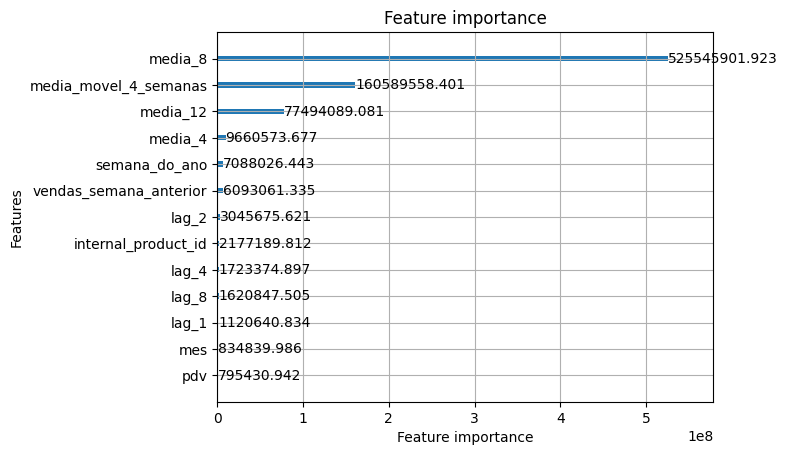

In [29]:
lgb.plot_importance(model, max_num_features=15, importance_type='gain')
plt.show()

In [30]:
!pip install optuna lightgbm -q

import optuna
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.4/247.4 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 607.6/607.6 kB 32.1 MB/s eta 0:00:00


In [31]:
def criar_features(df):
    df = df.copy()

    # Features temporais
    df['semana_do_ano'] = df['transaction_date'].dt.isocalendar().week.astype(int)
    df['mes'] = df['transaction_date'].dt.month
    df['ano'] = df['transaction_date'].dt.year

    # Lags
    for lag in [1, 2, 4, 8]:
        df[f'lag_{lag}'] = df.groupby(['pdv', 'internal_product_id'])['quantity'].shift(lag)

    # Médias móveis
    for janela in [4, 8, 12]:
        df[f'media_{janela}'] = (
            df.groupby(['pdv', 'internal_product_id'])['quantity']
              .shift(1) # evitar data leakage
              .rolling(window=janela, min_periods=1)
              .mean()
        )

    # Remover linhas com NaN
    df = df.dropna()

    return df


def wmape(y_true, y_pred):
    return np.sum(np.abs(y_true - y_pred)) / np.sum(y_true)

In [32]:
df_features = criar_features(df_weekly)

# Encoding de variáveis categóricas
for col in ['pdv', 'internal_product_id']:
    le = LabelEncoder()
    df_features[col] = le.fit_transform(df_features[col])

# Separar treino e validação
data_corte = df_features['transaction_date'].max() - pd.DateOffset(weeks=5)
df_train = df_features[df_features['transaction_date'] <= data_corte]
df_val = df_features[df_features['transaction_date'] > data_corte]

features = [col for col in df_features.columns if col not in ['transaction_date', 'quantity']]
target = 'quantity'

X_train = df_train[features]
y_train = df_train[target]
X_val = df_val[features]
y_val = df_val[target]

print(f"Tamanho treino: {len(X_train)}, Tamanho validação: {len(X_val)}")


Tamanho treino: 1831091, Tamanho validação: 357402


In [33]:
def objective(trial):
    params = {
        "objective": "regression",
        "metric": "rmse",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "n_estimators": 2000,
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "num_leaves": trial.suggest_int("num_leaves", 20, 300),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 10.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 10.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 50),
    }

    model = lgb.LGBMRegressor(**params)

    model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        eval_metric="rmse",
        callbacks=[lgb.early_stopping(100, verbose=False)]
    )

    preds = model.predict(X_val)
    return wmape(y_val, preds)  # minimizar WMAPE


study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)  # pode aumentar o número de trials para mais robustez

print("\n📌 Melhor trial encontrado:")
print(study.best_trial.params)

[I 2025-09-14 23:09:55,240] A new study created in memory with name: no-name-71c02d34-3f57-4be6-9eb0-bcddd5a5caa6
[I 2025-09-14 23:10:08,496] Trial 0 finished with value: 0.3766914664722178 and parameters: {'learning_rate': 0.023589470567168848, 'max_depth': 10, 'num_leaves': 108, 'subsample': 0.9415794786541796, 'colsample_bytree': 0.9437767632253744, 'reg_alpha': 8.49389139431626, 'reg_lambda': 5.261483589127357, 'min_child_weight': 40}. Best is trial 0 with value: 0.3766914664722178.
[I 2025-09-14 23:10:15,455] Trial 1 finished with value: 0.38450472348554027 and parameters: {'learning_rate': 0.06946981985636487, 'max_depth': 12, 'num_leaves': 137, 'subsample': 0.6918586154950122, 'colsample_bytree': 0.6732606389793746, 'reg_alpha': 4.193759491455027, 'reg_lambda': 2.4748579764288503, 'min_child_weight': 27}. Best is trial 0 with value: 0.3766914664722178.
[I 2025-09-14 23:10:22,392] Trial 2 finished with value: 0.3853546284555909 and parameters: {'learning_rate': 0.0286843597349543


📌 Melhor trial encontrado:
{'learning_rate': 0.14952849612112631, 'max_depth': 10, 'num_leaves': 295, 'subsample': 0.8645590189497895, 'colsample_bytree': 0.6296652351981894, 'reg_alpha': 7.8007119059262475, 'reg_lambda': 5.579819787032287, 'min_child_weight': 36}


In [34]:
best_params = study.best_trial.params
best_params.update({"objective": "regression", "metric": "rmse", "n_estimators": 3000})

final_model = lgb.LGBMRegressor(**best_params)

final_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric="rmse",
    callbacks=[lgb.early_stopping(100)]
)

# ===============================
# Avaliar modelo final
# ===============================
predictions = final_model.predict(X_val)

mae = mean_absolute_error(y_val, predictions)
rmse = np.sqrt(mean_squared_error(y_val, predictions))
wmape_val = wmape(y_val, predictions)

print("\n🎯 Resultados finais:")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"WMAPE: {wmape_val:.4f}")

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's rmse: 4.79613

🎯 Resultados finais:
MAE: 1.4463
RMSE: 4.7961
WMAPE: 0.3726


In [35]:
pip install pandas pyarrow

In [43]:
import os
import numpy as np
import pandas as pd
from google.colab import files

# pasta de destino no Drive (assume Drive já montado)
SAVE_DIR = "/content/drive/MyDrive/DesafioForecastVendas"
os.makedirs(SAVE_DIR, exist_ok=True)

# caminhos
SAVE_CSV = os.path.join(SAVE_DIR, "previsao_final_v2.csv")
SAVE_PARQUET = os.path.join(SAVE_DIR, "previsao_final_v2.parquet")

# --- tentar obter as previsões (adapta conforme a sua variável) ---
try:
    preds = preds_final            # se você chamou preds_final antes
except NameError:
    try:
        preds = predictions       # se usou 'predictions'
    except NameError:
        preds = final_model.predict(X_val)  # último recurso (se final_model e X_val existirem)

# --- garantir que preds tem o mesmo comprimento de df_val ---
# df_val deve ser o DataFrame usado para gerar X_val (antes de remover transaction_date)
if len(preds) != len(df_val):
    raise ValueError(f"Comprimentos diferentes: preds={len(preds)} vs df_val={len(df_val)}")

# --- construir DataFrame de submissão ---
df_submission = pd.DataFrame({
    "semana": pd.to_datetime(df_val["transaction_date"]).dt.isocalendar().week.astype(int),
    "pdv": df_val["pdv"].values,                     # se estiver label-encoded, decodifique antes (ver nota abaixo)
    "produto": df_val["internal_product_id"].values, # idem para produto
    "quantidade": preds
})

# --- transformar quantidade em inteiro e garantir >= 0 (muitos desafios exigem inteiros) ---
df_submission["quantidade"] = np.round(df_submission["quantidade"]).astype(int)
df_submission["quantidade"] = df_submission["quantidade"].clip(lower=0)

# --- reordenar colunas (garantia) ---
df_submission = df_submission[["semana", "pdv", "produto", "quantidade"]]

# --- salvar CSV com ponto-e-vírgula e encoding utf-8-sig ---
df_submission.to_csv(SAVE_CSV, sep=';', index=False, encoding='utf-8-sig')
print(f"✅ CSV salvo em: {SAVE_CSV} (sep=';')")

# --- salvar Parquet também (opcional) ---
df_submission.to_parquet(SAVE_PARQUET, index=False)
print(f"✅ Parquet salvo em: {SAVE_PARQUET}")

# --- checagem rápida: ler de volta com sep=';' ---
df_check = pd.read_csv(SAVE_CSV, sep=';')
print("\nPrimeiras linhas lidas do CSV salvo:")
display(df_check.head())

# --- baixar CSV para seu PC (colab) ---
files.download(SAVE_CSV)


✅ CSV salvo em: /content/drive/MyDrive/DesafioForecastVendas/previsao_final_v2.csv (sep=';')
✅ Parquet salvo em: /content/drive/MyDrive/DesafioForecastVendas/previsao_final_v2.parquet

Primeiras linhas lidas do CSV salvo:


,semana,pdv,produto,quantidade
0,48,1,2,1
1,50,1,2,1
2,51,1,2,1
3,52,1,2,1
4,48,1,9,4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>